## Tutorial : Particle dispersion through periodic nanoposts array

* Here we demonstrate how to use Stokesian dynamics to compute local hydrodynamic interactions between particle and nanoposts array, and then overdamped Langevin equation to simulate particle motion through periodic and ordered nanoposts array under both quiescent and flow conditions

* Nanoposts are modeled using chain of tangential spheres to compute hydrodynamic interactions accurately

<img src="SquareNanopostArray.png" alt="drawing" width="600"/>

* Next, we use mean square displacement method to compute long-time particle diffusivity and dispersion coefficients

### Particle simulation method

* Particle motion is governed by following overdamped Langevin equation:

<img src="overdampedLangevin.png" alt="drawing" width="600"/>

* Integrating the above equation over time dt that is large compared to momentum relaxation time, but small compared to diffusive time scale yields the following equation:
\begin{equation}
        \mathbf{r}_i(t+\text{d}t)  = \mathbf{r}_i(t) + \text{d}t k_{\text{B}} {T} \nabla \cdot (\mathbf{R}_{ii}^{\text{FU}})^{-1}(t) +
        \text{d}t (\mathbf{R}_{ii}^{\text{FU}})^{-1}(t)
        \cdot \left[\sum_{j=1}^{N_{\rm{np}}+1}\mathbf{R}_{ij}^{\text{FU}}(t) \cdot \mathbf{V}_{\infty}(\mathbf{r}_j) + \mathbf{F}_i^{\text{B}}(t) + \mathbf{F}_i^{\text{C}}(t) \right]
\end{equation}

* In Stokesian dynamics, local resistance matrix $\mathbf{R}^{\text{FU}}$ is computed as sum of far-field $(\mathbf{M}^{\infty})^{-1}$ and short-range lubrication contributions $\mathbf{R}^{\text{Lub}}$ : <br>
\begin{equation}\label{RFUmatrix}
    \mathbf{R}^{\text{FU}} = (\mathbf{M}^{\infty})^{-1} + \mathbf{R}^{\text{lub}}.
\end{equation}

* Far-field M<sup>$\infty$</sup> is computed via Ewald sum of Rotne-Prager (RP) tensor. Since $\mathbf{M}^{\infty}$ changes with particle position only,$(\mathbf{M}^{\infty})^{-1}$ is pre-computed on regular grid to reduce computational cost.

* Far-field $\mathbf{M}^{\infty}$ is computed using large periodic simulation box (3 x 3 unit-cells) to minimize finite-size effects

* Short-range lubrication contributions $\mathbf{R}^{\text{Lub}}$ is computed on the fly due to its strong dependence on the separation distance between particle and nanoposts particles

* The matrix $\mathbf{R}^{\text{Lub}}$ is computed by subtracting two particles far-field RP contribution (already included in $(\mathbf{M}^{\infty})^{-1}$) from full two-particle resistance tensor $\mathbf{R}^{\text{2P}}$ : <br>
\begin{equation}
    \mathbf{R}_{ii}^{\text{lub}}=\sum_{j=1\neq i}^{N_{\rm{np}}+1}\left(\mathbf{R}_{ii}^{2\text{P}}(s,\lambda)-((\mathbf{M}^{\text{RP}})^{-1})_{ii}(\mathbf{r}_{ij})\right)
\end{equation}

\begin{equation}
    \mathbf{R}_{ij}^{\text{lub}}= \mathbf{R}_{ij}^{2\text{P}}(s,\lambda)-((\mathbf{M}^{\text{RP}})^{-1})_{ij}(\mathbf{r}_{ij}),
\end{equation}
where $(\mathbf{M}^{\text{RP}})^{-1}$ is the inverse of the two-particle RP mobility matrix.

* The computational cost associated with inverting $\mathbf{M}^{\text{RP}}$ at every iteration step is mitigated by pre-tabulating submatrices $((\mathbf{M}^{\text{RP}})^{-1})_{ii}$ and $((\mathbf{M}^{\text{RP}})^{-1})_{ij}$ and using following fit functions to evaluate these quantities during the simulations:<br>
\begin{equation}
    ((\mathbf{M}^{\text{RP}})^{-1})_{ii} = \sum_{n=0}^{n=6} \left(\frac{c_n}{s^n}\mathbf{I} + \frac{d_n}{s^n}{\boldsymbol{\hat{\textbf{r}}}}{\boldsymbol{\hat{\textbf{r}}}} \right)
\end{equation}

\begin{equation}
    ((\mathbf{M}^{\text{RP}})^{-1})_{ij} = \sum_{n=0}^{n=6} \left(\frac{c'_n}{s^n}\mathbf{I} + \frac{d'_n}{s^n}{\boldsymbol{\hat{\textbf{r}}}}{\boldsymbol{\hat{\textbf{r}}}} \right),
\end{equation}
where $c_n$, $c'_n$, $d_n$, and $d'_n$ are fit parameters

### Simulation set-up : Compute particle diffusivity for confinement parameter $\zeta = d_{\text{p}}/S = 0.3$ in 3-D nanoposts array

1. Model square nanoposts array for a given dimensionless confinement parameter $\zeta = d_{\text{p}}/S$ of nanoposts diameter $d_{\text{np}}$, where $d_{\text{p}}$ is the particle diameter and $S$ is surface-to-surface nanoposts spacing
 - Write $\zeta=0.3$ in the input file 'post_particle.txt'<br>
 - Compile code to generate executable file and run executable file <br>
 ` ifort module.f90 post_particle_pos.f90 -o post ` <br>
    ` ./post `

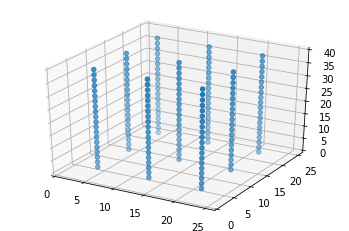

In [28]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
f=np.genfromtxt('post_pos.txt',skip_header=9)
ax.scatter(f[:,0], f[:,1], f[:,2], marker='o')
ax.set_xlim(0,26.01)
ax.set_ylim(0,26.01)
ax.set_zlim(0,40)
plt.show()

2. Compute grand resistance matrix on grids of gridsize 0.1 within a unit cell <br>
    - Compile code to generate executable file and run executable file <br>
    ` ifort module.f90 FF_res_mat.f90 -o FF_res_mat ` <br>
    ` ./FF_res_mat `

3. Compute fitting parameters of inverse of pair-wise mobility matrix with $r_{\text{p}}=1.0$  and $r_{\text{np}}=1.0$<br>
    ` python mat_fit.py $r_{p}$ $r_{np}$ `

4. Run particle trajectory simulation
    - Write flow velocity to 0.0 and flow direction to 0.0 in the input file "traj.txt" <br>
    - Compile code to generate executable file and run executable file with trajectory sequence number <br>
    ` ifort module.f90 traj_3d.f90 -o traj_3d ` <br>
    ` echo "sequence" | ./traj_3d `

5. Analyze particle trajectories to compute diffusivity as function of time-interval using mean-square displacement method
 - Include the required inputs in the input file "analysis.txt" according to the trajectory data
 - Compile code to generate executable file and run executable file <br>
    ` ifort analysis_module.f90 analysis_main.f90 -o analysis ` <br>
    ` ./analysis`

[0.66352923] [[0.00019328]]


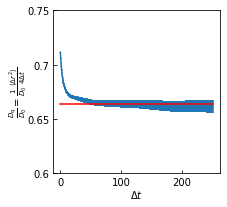

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(x,a):
        return a;

x1=100; x2=500
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(111,xscale='linear',yscale='linear')
f=np.genfromtxt('diff_avg.txt',skip_header=0)
ax.errorbar(f[:,0],f[:,1],f[:,2])
[popt,pcov]=curve_fit(func,f[x1:x2,0],f[x1:x2,1],sigma=f[x1:x2,2],absolute_sigma=True)
print(popt,np.sqrt(pcov))
ax.errorbar(f[:,0], func(f[:,0], *popt), fmt='r-')
plt.minorticks_off()
ax.set_xlabel(r'$\Delta{t}$',labelpad=1)
ax.set_ylabel(r'$\frac{D_{\mathrm{q}}}{D_0}=\frac{1}{D_0}\frac{\langle\Delta{r}^2\rangle}{4\Delta{t}}$',labelpad=-2)
ax.set_ylim(0.6,0.75)
ax.set_yticks([0.60,0.65,0.70,0.75])
ax.set_yticklabels([0.60,0.65,0.70,0.75])
ax.tick_params(axis='both',which='both',direction='in')
plt.show()

### Simulation set-up : Compute particle dispersion coefficients for confinement parameter $\zeta = d_{\text{p}}/S = 0.3$ for $V_{\infty}=20.0$ in 3-D nanoposts array

* Steps 1-3 in above simulation set-up are same

* In step 4, write flow velocity to 20.0 and flow direction to 45.0 in input file 'traj.txt' and run executable file

* In step 5, write the required inputs in the input file 'analysis.txt' according to trajectory data and write '1' for flow direction and run executable file 

[10.60264935] [[0.00448761]]


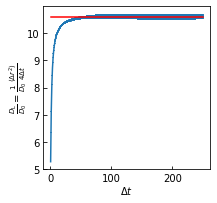

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(x,a):
        return a;

x1=100; x2=500
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(111,xscale='linear',yscale='linear')
f=np.genfromtxt('disp_avg.txt',skip_header=2)
ax.errorbar(f[:,0],f[:,1],f[:,2])
[popt,pcov]=curve_fit(func,f[x1:x2,0],f[x1:x2,1],sigma=f[x1:x2,2],absolute_sigma=True)
print(popt,np.sqrt(pcov))
ax.errorbar(f[:,0], func(f[:,0], *popt), fmt='r-')
plt.minorticks_off()
ax.set_xlabel(r'$\Delta{t}$',labelpad=1)
ax.set_ylabel(r'$\frac{D_{\mathrm{L}}}{D_0}=\frac{1}{D_0}\frac{\langle\Delta{r}^2\rangle}{4\Delta{t}}$',labelpad=-2)
# ax.set_ylim(0.6,0.75)
# ax.set_yticks([0.60,0.65,0.70,0.75])
# ax.set_yticklabels([0.60,0.65,0.70,0.75])
ax.tick_params(axis='both',which='both',direction='in')
plt.show()